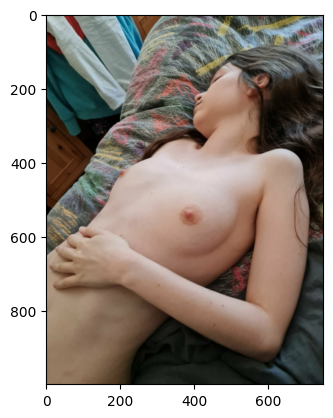

Image shape: (1000, 750, 3)


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# Load the image
image_path = '1.jpg'  # Update this path
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.show()

# Show the shape of the image array
print("Image shape:", img.shape)


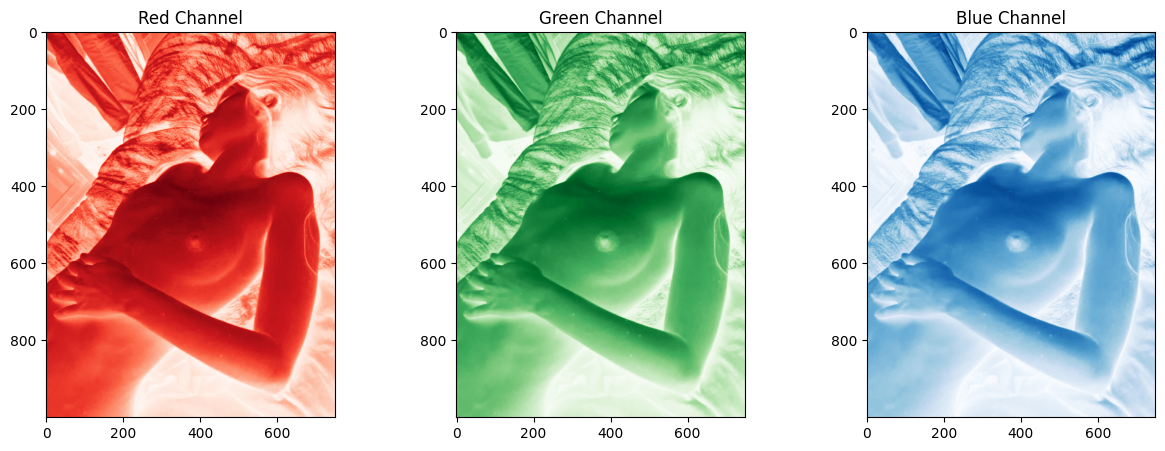

In [36]:
# Display each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axs[0].imshow(img[:, :, 0], cmap='Reds')
axs[0].set_title('Red Channel')

# Green channel
axs[1].imshow(img[:, :, 1], cmap='Greens')
axs[1].set_title('Green Channel')

# Blue channel
axs[2].imshow(img[:, :, 2], cmap='Blues')
axs[2].set_title('Blue Channel')

plt.show()


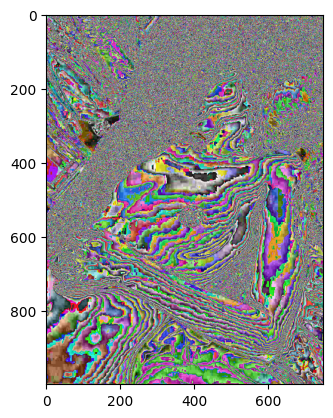

array([[-1.  ,  0.04,  0.08,  0.04,  0.04],
       [ 0.04,  0.08,  0.16,  0.08,  0.04],
       [ 0.16,  0.32,  0.64,  0.32,  0.16],
       [ 0.04,  0.08,  0.16,  0.08,  0.04],
       [ 0.04,  0.04,  0.08,  0.04, 20.  ]])

In [37]:
from scipy.ndimage import convolve
import numpy as np


# Apply the convolution to each color channel
blurred_img = np.zeros_like(img)
for i in range(3):  # Assuming img has three channels
    blurred_img[:, :, i] = convolve(img[:, :, i], kernel, mode='constant', cval=0.0)

# Display the blurred image
plt.imshow(blurred_img)
plt.show()
kernel

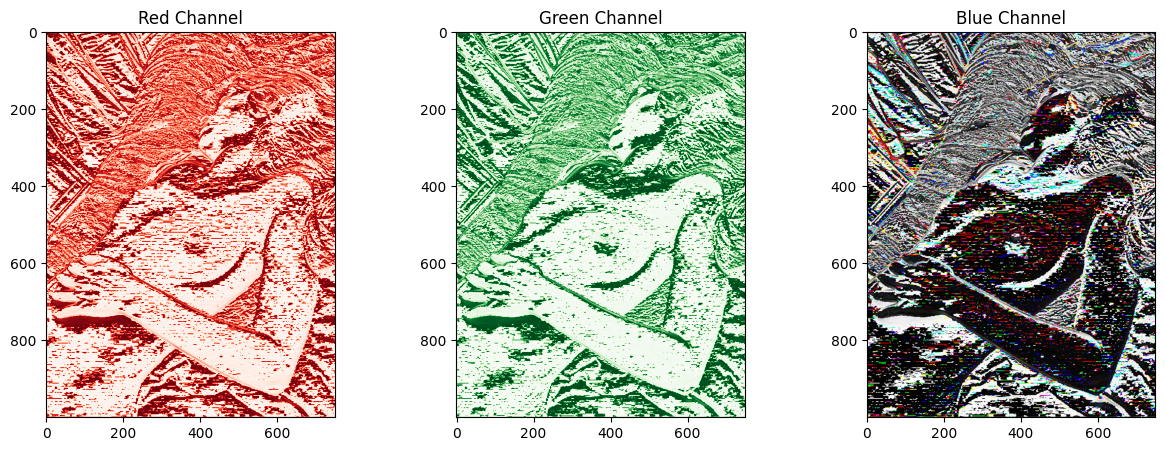

In [41]:
# Horizontal edge detection kernel
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]])

# Apply the kernel to each color channel
horizontal_edges_img = np.zeros_like(img)
for i in range(3):
    horizontal_edges_img[:, :, i] = convolve(img[:, :, i], kernel_horizontal, mode='constant', cval=0.0)
# Display each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axs[0].imshow(horizontal_edges_img[:, :, 0], cmap='Reds')
axs[0].set_title('Red Channel')

# Green channel
axs[1].imshow(horizontal_edges_img[:, :, 1], cmap='Greens')
axs[1].set_title('Green Channel')

# Blue channel
axs[2].imshow(horizontal_edges_img[:, :, 2], cmap='Blues')
axs[2].set_title('Blue Channel')
plt.imshow(horizontal_edges_img)
plt.show()


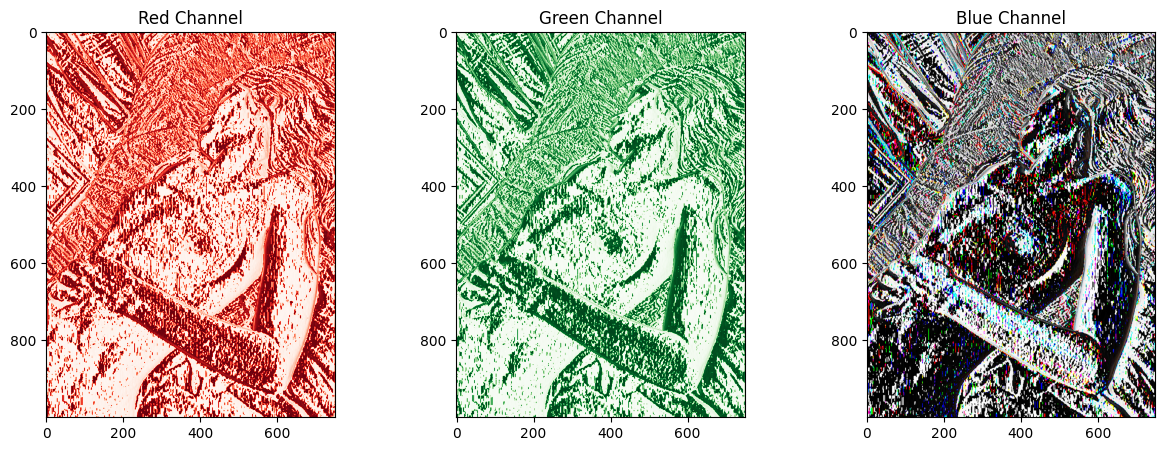

In [40]:
# Vertical edge detection kernel
kernel_vertical = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])

# Apply the kernel to each color channel
vertical_edges_img = np.zeros_like(img)
for i in range(3):
    vertical_edges_img[:, :, i] = convolve(img[:, :, i], kernel_vertical, mode='constant', cval=0.0)

# Display each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Red channel
axs[0].imshow(vertical_edges_img[:, :, 0], cmap='Reds')
axs[0].set_title('Red Channel')

# Green channel
axs[1].imshow(vertical_edges_img[:, :, 1], cmap='Greens')
axs[1].set_title('Green Channel')

# Blue channel
axs[2].imshow(vertical_edges_img[:, :, 2], cmap='Blues')
axs[2].set_title('Blue Channel')
plt.imshow(vertical_edges_img)
plt.show()


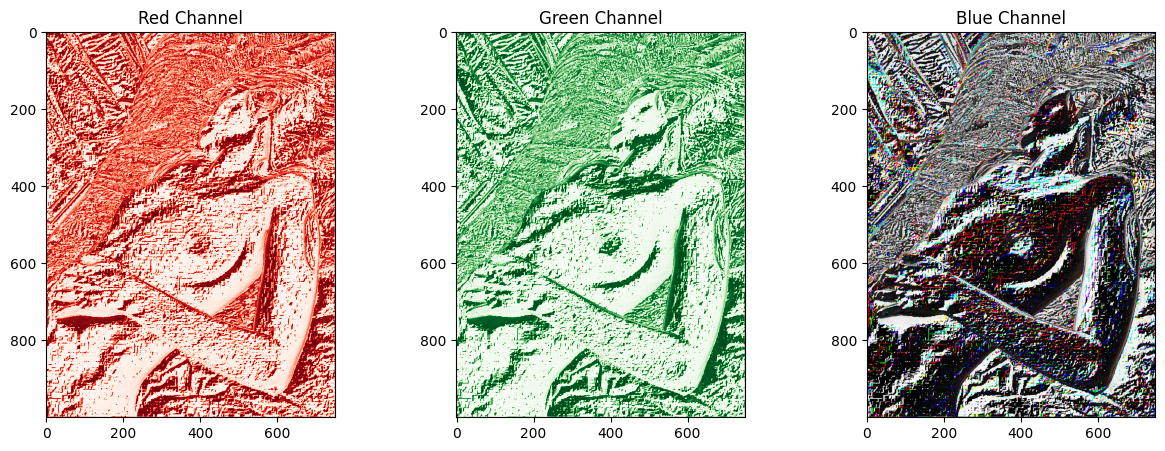

In [42]:
# Horizontal edge detection kernel
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]])

# Apply the kernel to each color channel
horizontal_edges_img = np.zeros_like(img)
for i in range(3):
    horizontal_edges_img[:, :, i] = convolve(img[:, :, i], kernel_horizontal, mode='constant', cval=0.0)
# Display each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
edges_img = horizontal_edges_img + vertical_edges_img
# Red channel
axs[0].imshow(edges_img[:, :, 0], cmap='Reds')
axs[0].set_title('Red Channel')

# Green channel
axs[1].imshow(edges_img[:, :, 1], cmap='Greens')
axs[1].set_title('Green Channel')

# Blue channel
axs[2].imshow(edges_img[:, :, 2], cmap='Blues')
axs[2].set_title('Blue Channel')
plt.imshow(edges_img)
plt.show()



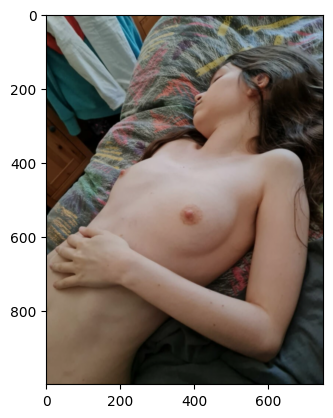

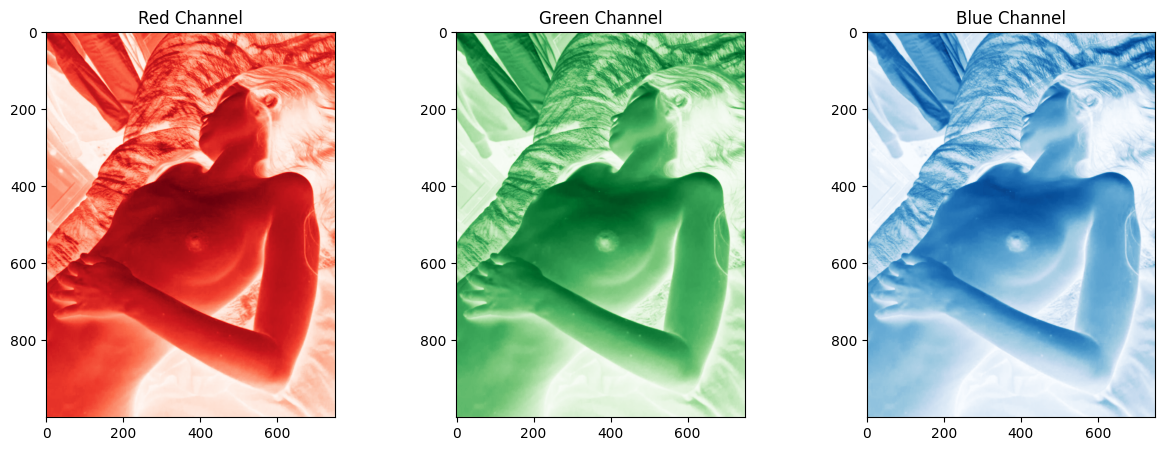

In [43]:
# Sharpening kernel
kernel_sharpen = np.array([[ 00.1, -0.1,  00.1],
                           [-0.1,  0.9, -0.1],
                           [ 00.1, -0.1,  00.1]])

# Apply the kernel to each color channel
sharpened_img = np.zeros_like(img)
for i in range(3):
    sharpened_img[:, :, i] = convolve(img[:, :, i], kernel_sharpen, mode='constant', cval=0.0)

plt.imshow(sharpened_img)
plt.show()
# Display each color channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Red channel
axs[0].imshow(sharpened_img[:, :, 0], cmap='Reds')
axs[0].set_title('Red Channel')

# Green channelimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for our distributions
x = np.linspace(-10, 10, 1000)

# Discretize two normal distributions
# For example, let's use N(0, 1) and N(2, 2)
pdf1 = norm.pdf(x, 0, 1)
pdf2 = norm.pdf(x, 2, 2)

# Normalize the distributions to ensure they sum to 1
pdf1 /= pdf1.sum()
pdf2 /= pdf2.sum()

# Convolve the two distributions
convolved_pdf = np.convolve(pdf1, pdf2, mode='full')

# Since the convolution expands the array, we need to adjust the x-axis for plotting
convolved_x = np.linspace(2 * x[0], 2 * x[-1], len(convolved_pdf))

# Plot the original and convolved distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label='N(0, 1)')
plt.plot(x, pdf2, label='N(2, 2)')
plt.plot(convolved_x, convolved_pdf, label='Convolved Distribution', linestyle='--')
plt.legend()
plt.title('Convolution of Two Probability Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

axs[1].imshow(sharpened_img[:, :, 1], cmap='Greens')
axs[1].set_title('Green Channel')

# Blue channel
axs[2].imshow(sharpened_img[:, :, 2], cmap='Blues')
axs[2].set_title('Blue Channel')

plt.show()


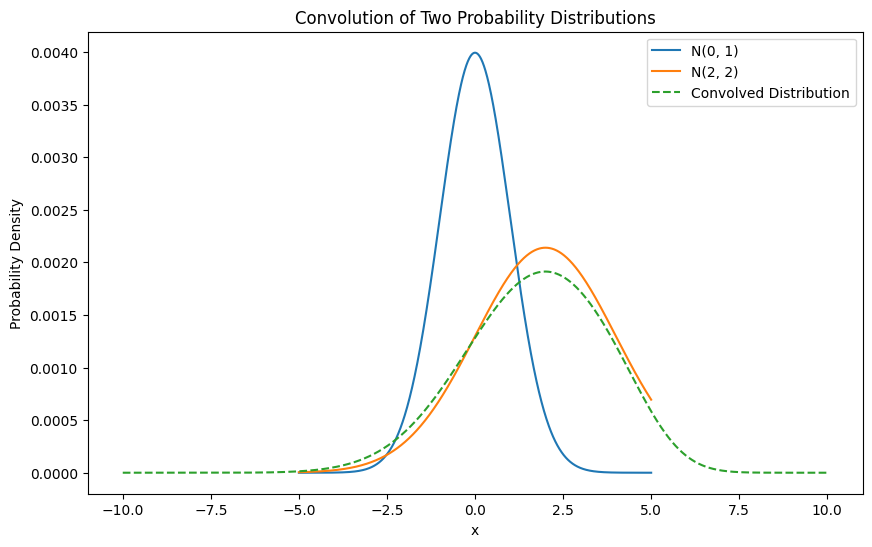

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for our distributions
x = np.linspace(-5, 5, 1000)

# Discretize two normal distributions
# For example, let's use N(0, 1) and N(2, 2)
pdf1 = norm.pdf(x, 0, 1)
pdf2 = norm.pdf(x, 2, 2)

# Normalize the distributions to ensure they sum to 1
pdf1 /= pdf1.sum()
pdf2 /= pdf2.sum()

# Convolve the two distributions
convolved_pdf = np.convolve(pdf1, pdf2, mode='full')

# Since the convolution expands the array, we need to adjust the x-axis for plotting
convolved_x = np.linspace(2 * x[0], 2 * x[-1], len(convolved_pdf))

# Plot the original and convolved distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label='N(0, 1)')
plt.plot(x, pdf2, label='N(2, 2)')
plt.plot(convolved_x, convolved_pdf, label='Convolved Distribution', linestyle='--')
plt.legend()
plt.title('Convolution of Two Probability Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()


In [2]:
import numpy as np
import time 
A = np.random.rand(300,5000)
B = np.random.rand(5000,10000)
time_1 = time.time()
C = np.einsum('ik, kj->ij', A, B)
time_2 = time.time()
f = time_2-time_1
print(f)
C

7.874306678771973


array([[1229.63995632, 1249.46590742, 1253.80724616, ..., 1230.69339565,
        1233.08548451, 1226.27989263],
       [1223.96478229, 1242.32567641, 1243.55309943, ..., 1225.64964841,
        1221.41479798, 1226.64545343],
       [1230.81179873, 1265.18893554, 1246.8186009 , ..., 1240.21155658,
        1244.59469587, 1224.00900895],
       ...,
       [1235.95151976, 1257.4226397 , 1248.37009409, ..., 1238.99643279,
        1244.37797808, 1239.96241792],
       [1242.89353235, 1282.12613077, 1261.49859667, ..., 1264.6009861 ,
        1264.40511273, 1260.75714004],
       [1237.68133416, 1260.01621511, 1247.675339  , ..., 1228.82618851,
        1248.95273679, 1248.84379813]])

In [3]:
D = np.zeros((300,1000))
time_1 = time.time()
for i in range(A.shape[0]):
    for j in range(B.shape[1]):
        total = 0
        for k in range(A.shape[1]):
            total += A[i,k] * B[k,j]
        D[i,j] =total
time_2 = time.time()
g = time_2-time_1
print(g)
D

IndexError: index 1000 is out of bounds for axis 1 with size 1000

In [ ]:
g / f

In [ ]:
f/g